In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

#  What's the structure of the object returned by sklearn?

In [3]:
type(mnist)

sklearn.datasets.base.Bunch

In [4]:
mnist.DESCR

'mldata.org dataset: mnist-original'

In [5]:
X = mnist['data']
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
X.shape

(70000, 784)

In [7]:
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [8]:
y.shape

(70000,)

In [9]:
d = X[34911]
l = y[34911]
l

5.0

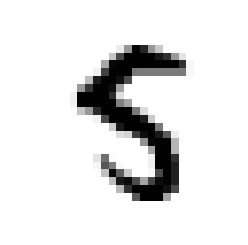

In [10]:
a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.axis('off')
plt.show()

In [11]:
d1 = X[0]
l1 = y[0]
l1

0.0

In [12]:
a = plt.imshow(d1.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.axis('off')
plt.show()

In [13]:
a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
plt.show()

In [14]:
d2 = X[64523]
l2 = y[64523]
l2

4.0

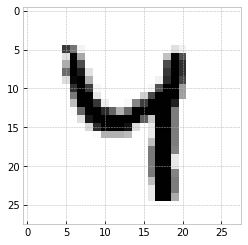

In [15]:
a = plt.imshow(d2.reshape(28, 28), cmap = matplotlib.cm.binary)

In [16]:
for i in X_train[:100]:
    a = plt.imshow(i.reshape(28, 28), cmap = matplotlib.cm.binary)

NameError: name 'X_train' is not defined

In [ ]:
y_train[0]

In [ ]:
a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.imshow(d1.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.imshow(d2.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.imshow(X[3].reshape(28, 28), cmap = matplotlib.cm.binary)

In [ ]:
for i in range(100):
    a = plt.imshow(X[3].reshape(28, 28), cmap = matplotlib.cm.binary)

In [ ]:
s = pd.DataFrame(X_train[0])
s1 = pd.DataFrame(s.values.reshape(28,28))
s1

In [ ]:
X_train[:100]

In [18]:
shuffle_index = np.random.permutation(70000)
X1, y1 = X[shuffle_index], y[shuffle_index]
y1

array([ 2.,  1.,  9., ...,  9.,  7.,  5.])

In [19]:
X_train, y_train = X1[:60000], y1[:60000]
X_test, y_test  = X1[60000:], y1[60000:]

In [20]:
from sklearn.linear_model import SGDClassifier
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [21]:
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(X_train, y_train_5)

In [22]:
sgd_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [23]:
sgd_clf.predict([d1])
l1

array([False], dtype=bool)

0.0

In [24]:
sgd_clf.predict([d2])
l2

array([False], dtype=bool)

4.0

In [25]:
d3 = X1[1]
l3 = y1[1]
l3

1.0

In [26]:
sgd_clf.predict([d3])
l3

array([False], dtype=bool)

1.0

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.963  ,  0.96035,  0.96085])

In [28]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [29]:
cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9087 ,  0.90955,  0.9104 ])

In [30]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_ps = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 
confusion_matrix(y_train_5, y_ps)

array([[53261,  1312],
       [ 1004,  4423]])

In [31]:
confusion_matrix(y_train_5, y_train_5)

array([[54573,     0],
       [    0,  5427]])

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_ps)
recall_score(y_train_5, y_ps)

0.77122929380993899

0.81499907868067067

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_ps)

0.79251030281311596

In [34]:
y_scores = sgd_clf.decision_function([d])
y_scores

array([ 159727.7369093])

In [35]:
y_scores1 = sgd_clf.decision_function([d1])
y_scores1

array([-426985.07609006])

In [36]:
threshold = 0
y_scores > threshold

array([ True], dtype=bool)

In [37]:
threshold = 200000
y_scores > threshold

array([False], dtype=bool)

In [38]:
threshold = 200000
y_scores1 > threshold

array([False], dtype=bool)

In [39]:
threshold = -90000
y_scores1 > threshold

array([False], dtype=bool)

In [40]:
from sklearn.metrics import precision_recall_curve

def plot_pr_v_t(precisions, recalls, thresholds):
    plt.figure(figsize=(14,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim(0, 1)
    
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([-347203.17424082, -369960.15313126, -620855.87898063, ...,
       -854959.89960908, -109110.91528578, -630301.21971515])

In [41]:
y_scores.shape

(60000,)

In [42]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [43]:
precision_recall_curve(y_train_5, y_scores)

(array([ 0.09075403,  0.09073882,  0.09074034, ...,  1.        ,
         1.        ,  1.        ]),
 array([  1.00000000e+00,   9.99815736e-01,   9.99815736e-01, ...,
          3.68527732e-04,   1.84263866e-04,   0.00000000e+00]),
 array([-1684002.6608054 , -1683810.64015999, -1682149.48761694, ...,
          926583.49115402,   950268.90273466,  1071553.1877311 ]))

In [44]:
len(precision_recall_curve(y_train_5, y_scores))

3

In [45]:
precision_recall_curve(y_train_5, y_scores)[0].shape

(59800,)

In [46]:
precision_recall_curve(y_train_5, y_scores)[1].shape

(59800,)

In [47]:
precision_recall_curve(y_train_5, y_scores)[2].shape

(59799,)

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

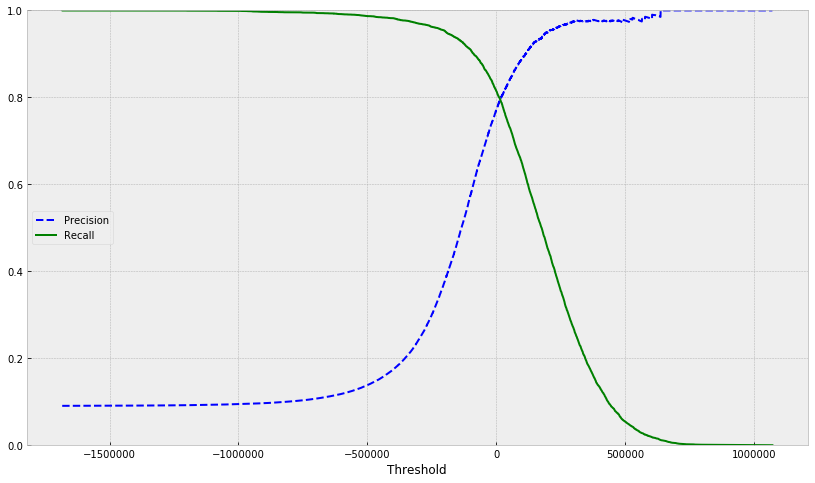

In [49]:
plot_pr_v_t(precisions, recalls, thresholds)

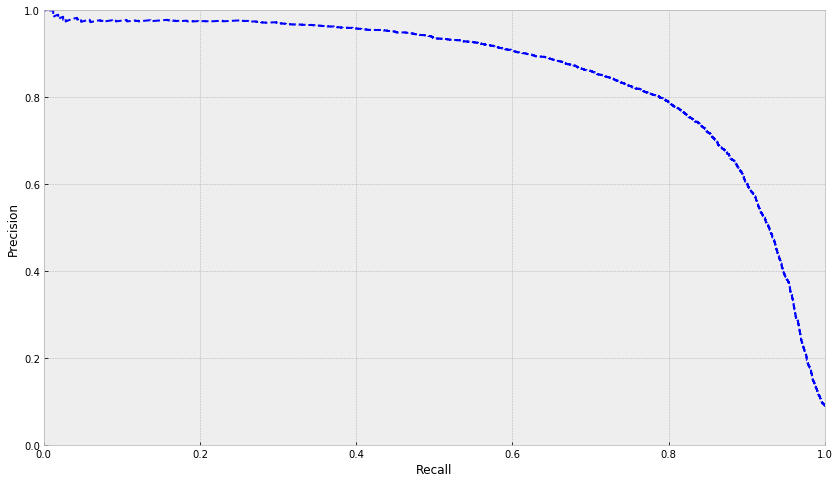

In [50]:
def plot_p_v_r(precisions, recalls):
    plt.figure(figsize=(14,8))
    plt.plot(recalls, precisions, 'b--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
plot_p_v_r(precisions, recalls)

In [51]:
y_pred_with_custom_threshold = y_scores > 130000
y_pred_with_custom_threshold

array([False, False, False, ..., False, False, False], dtype=bool)

In [52]:
y_pred_with_custom_threshold = y_scores > 130000
precision_score(y_train_5, y_pred_with_custom_threshold)
recall_score(y_train_5, y_pred_with_custom_threshold)

0.91356957649092485

0.58430071862907684

In [53]:
confusion_matrix(y_train_5, y_pred_with_custom_threshold)

array([[54273,   300],
       [ 2256,  3171]])

In [54]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(14,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([-0.01, 1, -0.01, 1])
    plt.xlabel('False positive rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr)

In [55]:
roc_curve(y_train_5, y_scores)

(array([  0.00000000e+00,   0.00000000e+00,   1.83240797e-05, ...,
          9.96316860e-01,   9.96316860e-01,   1.00000000e+00]),
 array([  1.84263866e-04,   1.21614151e-02,   1.21614151e-02, ...,
          9.99815736e-01,   1.00000000e+00,   1.00000000e+00]),
 array([ 1071553.1877311 ,   638043.02101387,   637393.46554343, ...,
        -1683810.64015999, -1684002.6608054 , -2968561.31056131]))

In [56]:
from sklearn.metrics import roc_auc_score
1 - roc_auc_score(y_train_5, y_scores)

0.033279986187283672

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
# RFC's `predict_proba` returns probabilities that the given observation belongs to a given class
y_probas = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba') 
# convert probabilities to scores
y_scores_fr = y_probas[:, 1] # probability of positive class
fpr_fr, tpr_fr, thr_fr = roc_curve(y_train_5, y_scores_fr)
plot_roc_curve(fpr, tpr, label='SGDClassifier')
x = plt.plot(fpr_fr, tpr_fr, 'b:', label='RandomForestClassifier')
x = plt.legend(loc='lower right')

In [58]:
roc_auc_score(y_train_5, y_scores_fr)
y_fr_ps = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_fr_ps)
recall_score(y_train_5, y_fr_ps)

0.99226649724371829

0.9825174825174825

0.82845034088815184

In [59]:
roc_auc_score(y_train_5, y_scores_fr)

0.99226649724371829

In [60]:
y_fr_ps

array([False, False, False, ..., False, False, False], dtype=bool)

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
x = gnb_clf.fit(X_train, y_train_5)
gnb_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [62]:
gnb_clf.predict([d1])
l1

array([ True], dtype=bool)

0.0

In [63]:
from sklearn.multiclass import OneVsOneClassifier
one_clf = OneVsOneClassifier(sgd_clf)
x = one_clf.fit(X_train, y_train_5)
one_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [64]:
from sklearn.multiclass import OneVsOneClassifier
one_clf = OneVsOneClassifier(forest_clf)
x = one_clf.fit(X_train, y_train_5)
one_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [65]:
from sklearn.multiclass import OneVsOneClassifier
one_clf = OneVsOneClassifier(forest_clf)
x = one_clf.fit(X_train, y_train_5)
one_clf.predict([d1])
l1

array([False], dtype=bool)

0.0

In [66]:
from sklearn.multiclass import OneVsRestClassifier
rest_clf = OneVsOneClassifier(sgd_clf)
x = rest_clf.fit(X_train, y_train_5)
one_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [67]:
from sklearn.multiclass import OneVsRestClassifier
rest_clf = OneVsRestClassifier(sgd_clf)
x = rest_clf.fit(X_train, y_train_5)
one_clf.predict([d1])
l1

array([False], dtype=bool)

0.0

In [68]:
from sklearn.multiclass import OneVsRestClassifier
rest_clf = OneVsRestClassifier(forest_clf)
x = rest_clf.fit(X_train, y_train_5)
one_clf.predict([d])
l

array([ True], dtype=bool)

5.0

In [69]:
from sklearn.multiclass import OneVsRestClassifier
rest_clf = OneVsRestClassifier(forest_clf)
x = rest_clf.fit(X_train, y_train_5)
one_clf.predict([d1])
l1

array([False], dtype=bool)

0.0

In [70]:
plt.figure()
plt.subplot(1, 3, 1)
a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
plt.xlabel(l)
plt.subplot(1, 3, 2)
a = plt.imshow(d1.reshape(28, 28), cmap = matplotlib.cm.binary)
plt.xlabel(l1)

plt.subplot(1, 3, 3)
a = plt.imshow(d2.reshape(28, 28), cmap = matplotlib.cm.binary)
plt.xlabel(l2)



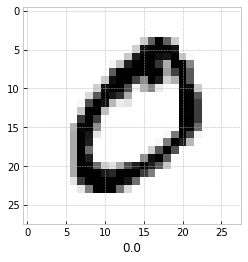

In [71]:
a = plt.imshow(X[0].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.xlabel(y[0])


In [72]:
plt.figure(figsize=(10,10))
for i in range(100):
    x = plt.subplot(10, 10, i+1)
    x = plt.imshow(X_train[i].reshape(28, 28), cmap = matplotlib.cm.binary)
    x = plt.title(y_train[i])
    x = plt.axis('off')

In [73]:
y_ps = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 
confusion_matrix(y_train_5, y_ps)
precision_score(y_train_5, y_ps)
recall_score(y_train_5, y_ps)
f1_score(y_train_5, y_ps)

array([[53261,  1312],
       [ 1004,  4423]])

0.77122929380993899

0.81499907868067067

0.79251030281311596

In [74]:
def performance(a,b,c):
    crossvalpredictions = cross_val_predict(a,b,c, cv=3) 
    con_mat = confusion_matrix(c, crossvalpredictions)
    pre_sco = precision_score(c, crossvalpredictions)
    rec_sco = recall_score(c, crossvalpredictions)
    f1_sco = f1_score(c, crossvalpredictions)
    print('crossvalpredictions =', crossvalpredictions)
    print('confusionmatrix = ', con_mat)
    print('(prescisionscore, recallscore, f1score) = ', (pre_sco, rec_sco, f1_sco))

In [75]:
performance(sgd_clf, X_train, y_train_5)

crossvalpredictions = [False False False ..., False False False]
confusionmatrix =  [[53261  1312]
 [ 1004  4423]]
(prescisionscore, recallscore, f1score) =  (0.77122929380993899, 0.81499907868067067, 0.79251030281311596)


In [76]:
performance(forest_clf, X_train, y_train_5)

crossvalpredictions = [False False False ..., False False False]
confusionmatrix =  [[54493    80]
 [  931  4496]]
(prescisionscore, recallscore, f1score) =  (0.9825174825174825, 0.82845034088815184, 0.89893032090372893)


In [77]:
from scipy.ndimage.interpolation import shift

In [78]:
pd.DataFrame(X_train[1].reshape(28,28))

0   1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   16  \
0    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
1    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
2    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
3    0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
4    0   0   0   0   0   0   0   0   0   0   0    0  139  255  182   12    0   
5    0   0   0   0   0   0   0   0   0   0   0  105  248  254  254  130    0   
6    0   0   0   0   0   0   0   0   0   0   0  174  254  254  254  143    0   
7    0   0   0   0   0   0   0   0   0   0   0   43  244  254  254  143    0   
8    0   0   0   0   0   0   0   0   0   0   0    0  211  254  254  143    0   
9    0   0   0   0   0   0   0   0   0   0   0    0  211  254  254  143    0   
10   0   0   0   0   0   0   0   0   0   0   0    0  211  254  254  163    0   
11   0   0   0   0   0   0   0   0   0   0   0    0  131  254  254  239    0   
12   0   0   0   0   0   0   0   0   0   0   0    0  116  254  254  239    0   
13   0   0   0   0   0   0   0   0   0   0   0    0   98  254  254  242   16   
14   0   0   0   0   0   0   0   0   0   0   0    0   20  254  254  254   87   
15   0   0   0   0   0   0   0   0   0   0   0    0   20  254  254  254  177   
16   0   0   0   0   0   0   0   0   0   0   0    0    2  183  254  254  177   
17   0   0   0   0   0   0   0   0   0   0   0    0    0  178  254  254  177   
18   0   0   0   0   0   0   0   0   0   0   0    0    0  178  254  254  198   
19   0   0   0   0   0   0   0   0   0   0   0    0    0  127  254  254  254   
20   0   0   0   0   0   0   0   0   0   0   0    0    0   50  248  254  254   
21   0   0   0   0   0   0   0   0   0   0   0    0    0    0  240  254  254   
22   0   0   0   0   0   0   0   0   0   0   0    0    0    0  191  254  254   
23   0   0   0   0   0   0   0   0   0   0   0    0    0    0   90  236  254   
24   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
25   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
26   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   
27   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0   

     17   18  19  20  21  22  23  24  25  26  27  
0     0    0   0   0   0   0   0   0   0   0   0  
1     0    0   0   0   0   0   0   0   0   0   0  
2     0    0   0   0   0   0   0   0   0   0   0  
3     0    0   0   0   0   0   0   0   0   0   0  
4     0    0   0   0   0   0   0   0   0   0   0  
5     0    0   0   0   0   0   0   0   0   0   0  
6     0    0   0   0   0   0   0   0   0   0   0  
7     0    0   0   0   0   0   0   0   0   0   0  
8     0    0   0   0   0   0   0   0   0   0   0  
9     0    0   0   0   0   0   0   0   0   0   0  
10    0    0   0   0   0   0   0   0   0   0   0  
11    0    0   0   0   0   0   0   0   0   0   0  
12    0    0   0   0   0   0   0   0   0   0   0  
13    0    0   0   0   0   0   0   0   0   0   0  
14    0    0   0   0   0   0   0   0   0   0   0  
15    0    0   0   0   0   0   0   0   0   0   0  
16    0    0   0   0   0   0   0   0   0   0   0  
17    0    0   0   0   0   0   0   0   0   0   0  
18    6    0   0   0   0   0   0   0   0   0   0  
19  163   23   0   0   0   0   0   0   0   0   0  
20  254  184   0   0   0   0   0   0   0   0   0  
21  254  148   0   0   0   0   0   0   0   0   0  
22  231   36   0   0   0   0   0   0   0   0   0  
23  102    0   0   0   0   0   0   0   0   0   0  
24    0    0   0   0   0   0   0   0   0   0   0  
25    0    0   0   0   0   0   0   0   0   0   0  
26    0    0   0   0   0   0   0   0   0   0   0  
27    0    0   0   0   0   0   0   0   0   0   0

In [118]:
def shifting(num, x, y):
    num1 = num.reshape(28,28)
    num2 = shift(num1, [x,y])
    return num2.reshape([-1])

In [119]:
shiftingvalues = ((1, 0), (-1, 0), (0, 1), (0, -1))
shiftingvalues

((1, 0), (-1, 0), (0, 1), (0, -1))

In [120]:
X_train1 = []
y_train1 = []
for x, y in shiftingvalues:
    for i in range(len(X_train)):
        X_train1.append(shifting(X_train[i], x, y))
        y_train1.append(y_train[i])

In [121]:
index1 = np.random.permutation(240000)
X_train1 = np.array(X_train1)[index1]
y_train1 = np.array(y_train1)[index1]

In [122]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.963  ,  0.96035,  0.96085])

In [123]:
y_train1_5 = (y_train1 == 5) 
len(y_train1_5)
len(X_train1)

240000

240000

In [124]:
X_train1.shape

(240000, 784)

In [125]:
y_train1.shape

(240000,)

In [126]:
X_train.shape

(60000, 784)

In [127]:
cross_val_score(forest_clf, X_train1, y_train1_5, cv=3, scoring='accuracy', n_jobs = 4)

array([ 0.98515  ,  0.9841375,  0.98555  ])